# AI Mental Fitness Tracker
-> A mental fitness tracker that uses AI to track your mental fitness and provide you with a score and tips to improve your mental fitness.

-> This notebook deals with the data collection and training of the model using different Machine Learning Algorithms to predict the mental fitness score.

### STEP 1: IMPORT THE NECESSARY LIBRARIES

In [1]:
#import necessary libraries
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import matplotlib.pyplot as plt #plotting

### About the Dataset:
-> The dataset used is a merge of two datasets:
 namely 
 * mental-and-substance-use-as-share-of-disease 
 * prevalence-by-mental-and-substance-use-disorder

### STEP 2: READ THE DATA FROM THE CSV FILES AND MERGE THEM

##### Load and prepare data

In [2]:
# read and load the dataset
data1=pd.read_csv("mental-and-substance-use-as-share-of-disease.csv")
data2=pd.read_csv("prevalence-by-mental-and-substance-use-disorder.csv")

##### Checking Dataset: mental-and-substance-use-as-share-of-disease

In [3]:
# print the first 8 rows of the dataset
data1.head(8)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
5,Afghanistan,AFG,1995,1.738272
6,Afghanistan,AFG,1996,1.778098
7,Afghanistan,AFG,1997,1.781815


##### Checking Dataset: prevalence-by-mental-and-substance-use-disorder

In [7]:
# print the first 5 rows of the dataset
data2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


#### MERGING TWO DATASETS

In [24]:
data = pd.merge(data1, data2)
# print the shape (rows, columns) of the dataset
print("New Dataframe Shape (Rows, Columns)=",data.shape)
# print the first 5 rows of the dataset
data.head()

New Dataframe Shape (Rows, Columns)= (6840, 11)


,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [25]:
# Set simplified column names
data = data.set_axis(['Country','Code','Year','DALY','Schizophrenia', 'Bipolar_disorder', 
                  'Eating_disorder','Anxiety','Drug_usage','Depression','Alcohol'], 
            axis='columns')#, copy=False)
data.head()

,Country,Code,Year,DALY,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


### STEP 3: DATA CLEANING
Checking the merged dataset for null values and removing them.

In [26]:
data.isnull().sum()

Country               0
Code                690
Year                  0
DALY                  0
Schizophrenia         0
Bipolar_disorder      0
Eating_disorder       0
Anxiety               0
Drug_usage            0
Depression            0
Alcohol               0
dtype: int64

* As we can see, there are 690 null values in the Code Column of the dataset. We will drop the Code Column as we do not need it for our analysis.

In [27]:
# drop the Code Column from the dataset
data.drop('Code',axis=1,inplace=True)

In [28]:
# View the first 5 rows of the dataset
data.head()

,Country,Year,DALY,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


### Step 4: EXPLORATORY DATA ANALYSIS

##### Observe the data types of the columns

In [29]:
# Observe the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   DALY              6840 non-null   float64
 3   Schizophrenia     6840 non-null   float64
 4   Bipolar_disorder  6840 non-null   float64
 5   Eating_disorder   6840 non-null   float64
 6   Anxiety           6840 non-null   float64
 7   Drug_usage        6840 non-null   float64
 8   Depression        6840 non-null   float64
 9   Alcohol           6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


##### Visualizing the data using a correlation matrix

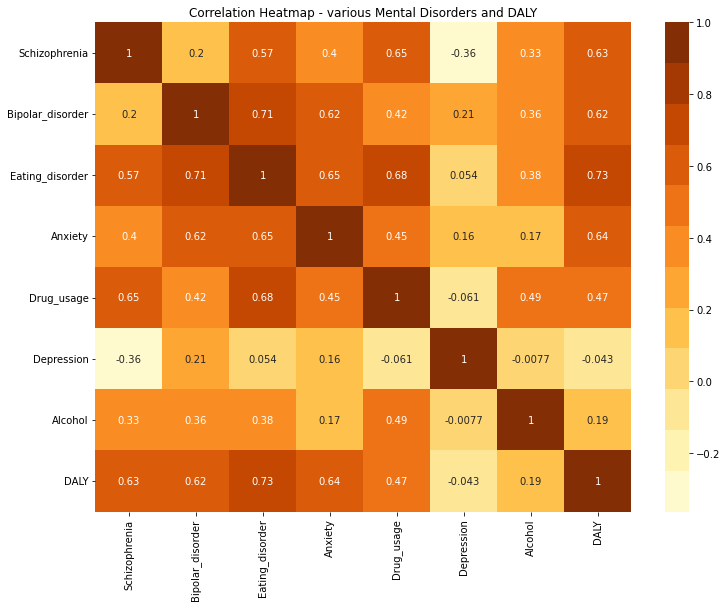

In [30]:
import seaborn as sns
df_num = data[['Schizophrenia', 'Bipolar_disorder', 'Eating_disorder',
                'Anxiety','Drug_usage','Depression','Alcohol','DALY']]
corr_matrix = df_num.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix,annot=True,cmap=sns.color_palette("YlOrBr", 12))
plt.title('Correlation Heatmap - various Mental Disorders and DALY')
plt.show()

##### Optional: Visualizing the data using other Plots

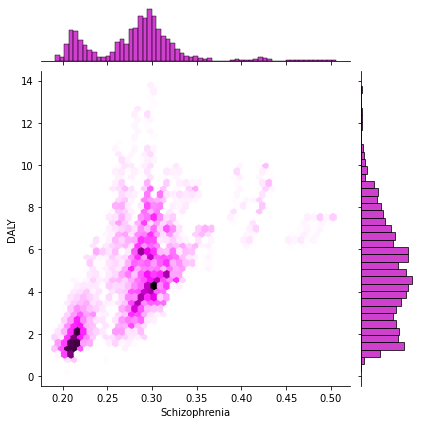

In [31]:
sns.jointplot(x='Schizophrenia',y='DALY',data = data,kind='hex',color='m')
plt.show()

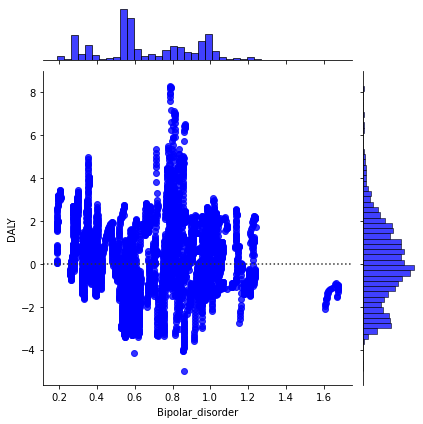

In [32]:
sns.jointplot(x='Bipolar_disorder',y='DALY',data=data,kind='resid',color='blue')
plt.show()

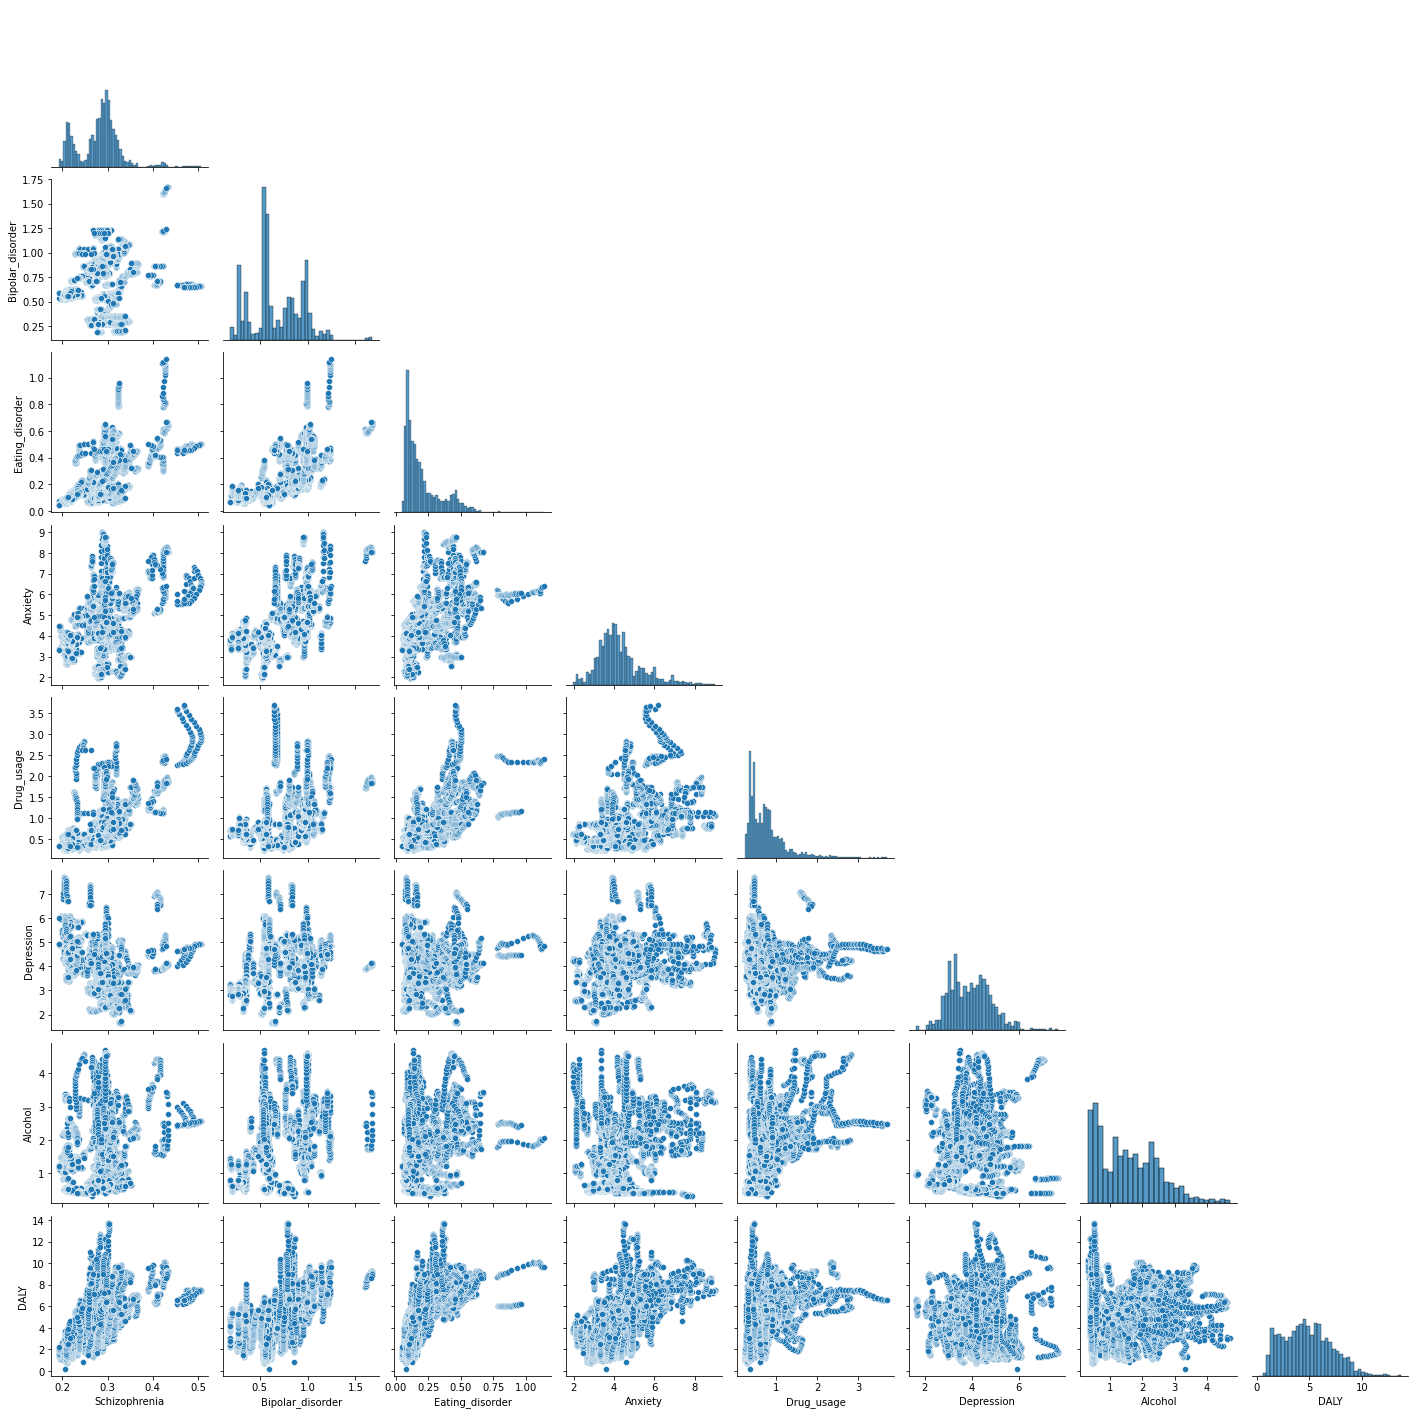

In [33]:
sns.pairplot(df_num,corner=True)
plt.show()

In [34]:
df1 = data['DALY'].groupby(data["Country"])
df1.mean()

Country
Afghanistan                       2.553085
African Region (WHO)              1.940398
Albania                           5.276702
Algeria                           6.451224
American Samoa                    4.529481
                                    ...   
World Bank Lower Middle Income    3.207812
World Bank Upper Middle Income    5.006917
Yemen                             3.470172
Zambia                            1.664278
Zimbabwe                          1.743918
Name: DALY, Length: 228, dtype: float64

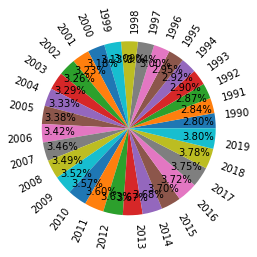

In [35]:
fig = plt.pie(data['DALY'].groupby(data["Year"]).mean(),labels=data['Year'].unique(),autopct='%1.2f%%', rotatelabels=True, pctdistance=0.8)
plt.show()

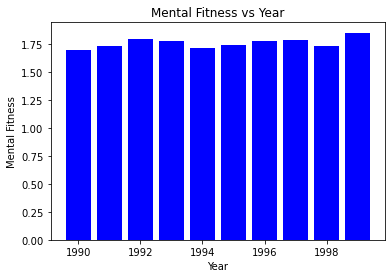

In [36]:
plt.bar(df['Year'].head(10).unique(),data['DALY'].head(10).groupby(df["Year"]).mean(),color='blue', width=0.8, )
plt.ylabel("Mental Fitness")
plt.xlabel("Year")
plt.title("Mental Fitness vs Year")
plt.show()

### STEP 5: DATA PREPROCESSING

##### Making a copy of the dataset for preprocessing for use in testing and analysis of different models.

In [37]:
df = data.copy()
df.head()

,Country,Year,DALY,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   DALY              6840 non-null   float64
 3   Schizophrenia     6840 non-null   float64
 4   Bipolar_disorder  6840 non-null   float64
 5   Eating_disorder   6840 non-null   float64
 6   Anxiety           6840 non-null   float64
 7   Drug_usage        6840 non-null   float64
 8   Depression        6840 non-null   float64
 9   Alcohol           6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


##### Label Encoding the Country Column (Categorical Values) to labels as it is a label and not for analysis.

In [39]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])
        
country_dict = dict(zip(l.classes_, range(len(l.classes_))))

##### Testing Part for generating a country thesaurus

In [40]:
l.classes_

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Eu

In [41]:
country_dict = dict(zip(l.classes_, range(len(l.classes_))))

In [42]:
country_dict["India"]

88

##### Bifurcating the dataset into features and target and further splitting training and testing sets

In [43]:
# Split the data into features and target
X = df.drop('DALY',axis=1)
y = df['DALY']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

## APPLYING MACHINE LEARNING ALGORITHMS

### STEP 6: Fit the LINEAR REGRESSION Model and evaluate its performance.

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 1.3899593724057981
RMSE is 1.1789653821914357
R2 score is 0.7413245790025274


The model performance for testing set
--------------------------------------
MSE is 1.1357545319272395
RMSE is 1.065717848178982
R2 score is 0.763897408705527


### STEP 7: Fit the RANDOM FOREST Regressor and evaluate its performance.

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.004771608582602663
RMSE is 0.06907683101158205
R2 score is 0.9991119899736325


The model performance for testing set
--------------------------------------
MSE is 0.03089005531604996
RMSE is 0.1757556693710048
R2 score is 0.993578522558943


### STEP 8: Fit the 12 Other Rrgression Models and evaluate their performance.

In [23]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/91/fd/fc99c8a63b4bae794d8c2ec9af17b80de1e4084fa4a0b17fb3d6161b6184/xgboost-1.7.6-py3-none-macosx_12_0_arm64.whl.metadata
Using cached xgboost-1.7.6-py3-none-macosx_12_0_arm64.whl (1.6 MB)


In [53]:
# Create a dictionary to store the model performance
model_performance = {}

# Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(xtrain, ytrain)
ridge_y_pred = ridge_model.predict(xtest)
ridge_mse = mean_squared_error(ytest, ridge_y_pred)
ridge_r2 = r2_score(ytest, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2, 'Y_Pred':ridge_y_pred}

# Lasso Regression
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(xtrain, ytrain)
lasso_y_pred = lasso_model.predict(xtest)
lasso_mse = mean_squared_error(ytest, lasso_y_pred)
lasso_r2 = r2_score(ytest, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2,'Y_Pred':lasso_y_pred}

# Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(xtrain, ytrain)
elastic_net_y_pred = elastic_net_model.predict(xtest)
elastic_net_mse = mean_squared_error(ytest, elastic_net_y_pred)
elastic_net_r2 = r2_score(ytest, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2,'Y_Pred':elastic_net_y_pred}

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(xtrain)
poly_model = LinearRegression()
poly_model.fit(X_poly, ytrain)
X_test_poly = poly_features.transform(xtest)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(ytest, poly_y_pred)
poly_r2 = r2_score(ytest, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2,'Y_Pred':poly_y_pred}

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(xtrain, ytrain)
tree_y_pred = tree_model.predict(xtest)
tree_mse = mean_squared_error(ytest, tree_y_pred)
tree_r2 = r2_score(ytest, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2,'Y_Pred':tree_y_pred}

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(xtrain, ytrain)
forest_y_pred = forest_model.predict(xtest)
forest_mse = mean_squared_error(ytest, forest_y_pred)
forest_r2 = r2_score(ytest, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2,'Y_Pred':forest_y_pred}

# SVR (Support Vector Regression)
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(xtrain, ytrain)
svr_y_pred = svr_model.predict(xtest)
svr_mse = mean_squared_error(ytest, svr_y_pred)
svr_r2 = r2_score(ytest, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2,'Y_Pred':svr_y_pred}

# XGBoost Regression
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(xtrain, ytrain)
xgb_y_pred = xgb_model.predict(xtest)
xgb_mse = mean_squared_error(ytest, xgb_y_pred)
xgb_r2 = r2_score(ytest, xgb_y_pred)
model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2,'Y_Pred':xgb_y_pred}

# K-Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(xtrain, ytrain)
knn_y_pred = knn_model.predict(xtest)
knn_mse = mean_squared_error(ytest, knn_y_pred)
knn_r2 = r2_score(ytest, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2,'Y_Pred':knn_y_pred}

# Bayesian Regression
from sklearn.linear_model import BayesianRidge
bayesian_model = BayesianRidge()
bayesian_model.fit(xtrain, ytrain)
bayesian_y_pred = bayesian_model.predict(xtest)
bayesian_mse = mean_squared_error(ytest, bayesian_y_pred)
bayesian_r2 = r2_score(ytest, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2,'Y_Pred':bayesian_y_pred}

# Neural Network Regression
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(xtrain, ytrain)
nn_y_pred = nn_model.predict(xtest)
nn_mse = mean_squared_error(ytest, nn_y_pred)
nn_r2 = r2_score(ytest, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2,'Y_Pred':nn_y_pred}

# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(xtrain, ytrain)
gb_y_pred = gb_model.predict(xtest)
gb_mse = mean_squared_error(ytest, gb_y_pred)
gb_r2 = r2_score(ytest, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2,'Y_Pred':gb_y_pred}

# Print model performance
for model, performance, in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'], "\n")


Model: 1. Ridge Regression
   Mean Squared Error (MSE): 1.1393226139229886
   R-squared Score: 0.7631556697280757 

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 2.7702717436599777
   R-squared Score: 0.42411117994122993 

Model: 3. Elastic Net Regression
   Mean Squared Error (MSE): 2.7402664049917025
   R-squared Score: 0.43034874097497444 

Model: 4. Polynomial Regression
   Mean Squared Error (MSE): 0.5365987525809088
   R-squared Score: 0.8884509351199747 

Model: 5. Decision Tree Regression
   Mean Squared Error (MSE): 0.08636586306726554
   R-squared Score: 0.9820461169237303 

Model: 6. Random Forest Regression
   Mean Squared Error (MSE): 0.03125921210673865
   R-squared Score: 0.993501781614993 

Model: 7. Support Vector Regression
   Mean Squared Error (MSE): 4.7911713917240055
   R-squared Score: 0.0040031105995593785 

Model: 8. XGBoost Regression
   Mean Squared Error (MSE): 0.04225689361124382
   R-squared Score: 0.9912155648062968 

Model: 9. K-Nearest Neighbo

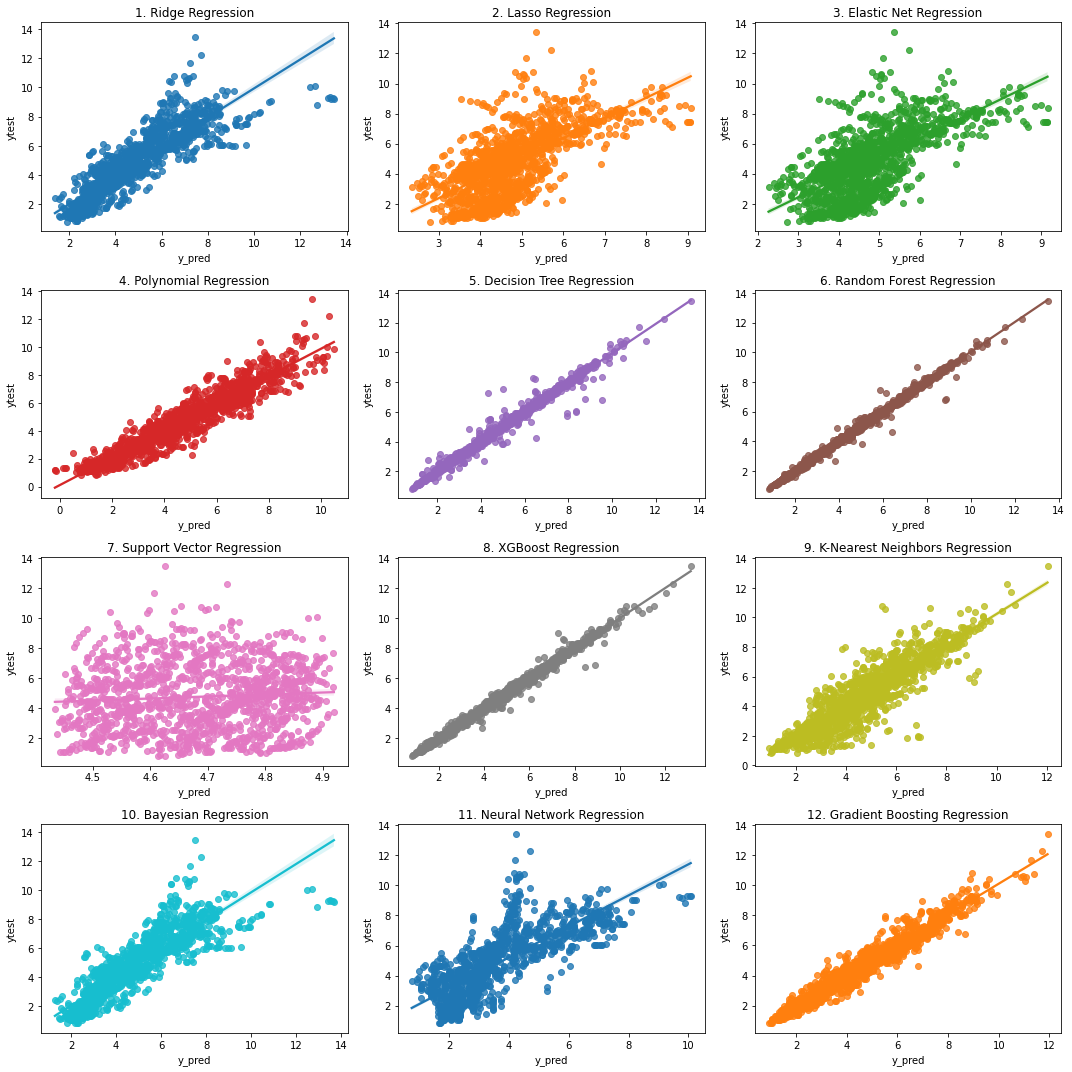

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a (4,3) grid for subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Plot regression plots for each model's y_pred
for idx, (model, performance) in enumerate(model_performance.items()):
    row_idx = idx // 3
    col_idx = idx % 3
    
    # Scatterplot with different colors
    sns.regplot(y=ytest, x=performance['Y_Pred'], ax=axes[row_idx, col_idx], color=f'C{idx}')
    axes[row_idx, col_idx].set_title(model)
    axes[row_idx, col_idx].set_xlabel('y_pred')
    axes[row_idx, col_idx].set_ylabel('ytest')

plt.tight_layout()
plt.show()


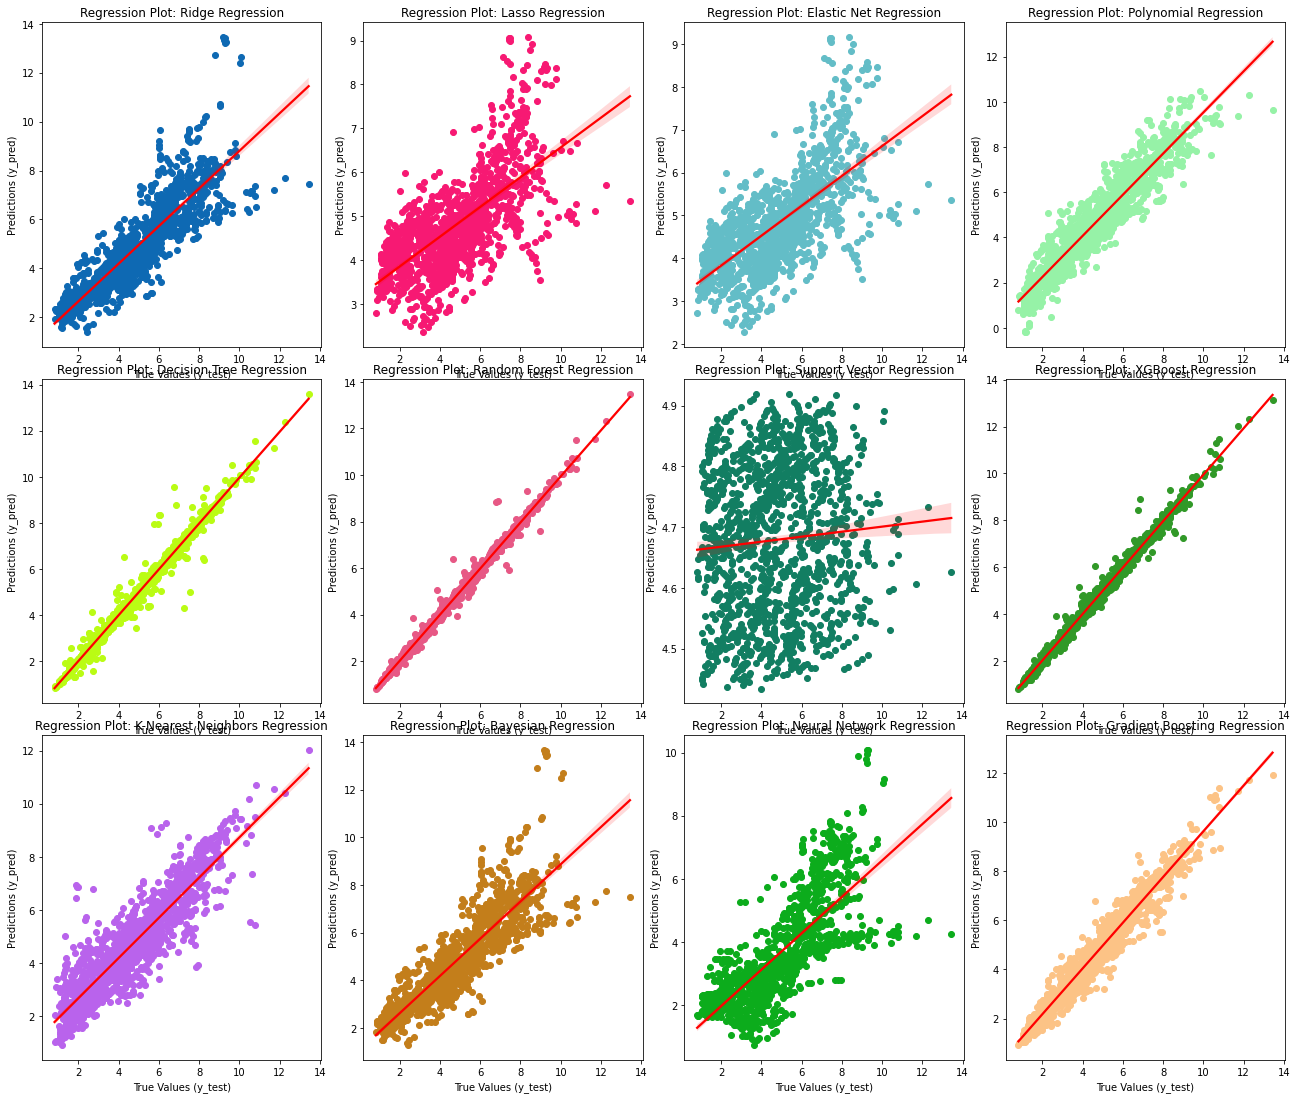

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot regression plot
def plot_regression(ax, model_name, y_test, y_pred):
    ax.scatter(y_test, y_pred, color=np.random.rand(3,))
    sns.regplot(x=y_test, y=y_pred, color='red', scatter=False, ax=ax)
    ax.set_xlabel("True Values (y_test)")
    ax.set_ylabel("Predictions (y_pred)")
    ax.set_title(f"Regression Plot: {model_name}")

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(18, 15))
fig.tight_layout()

# Loop through each model's performance and plot regression plots
for idx, (model, performance) in enumerate(model_performance.items()):
    model_name = model.split('. ')[1]
    y_pred = performance['Y_Pred']
    plot_regression(axes[idx // 4, idx % 4], model_name, ytest, y_pred)

plt.show()

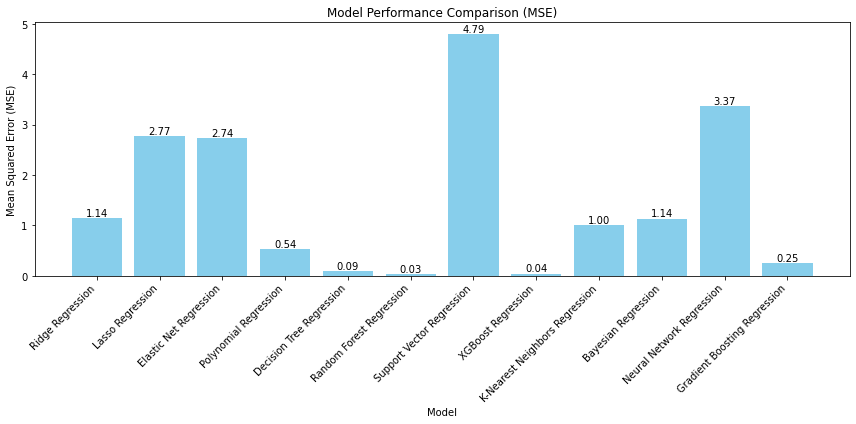

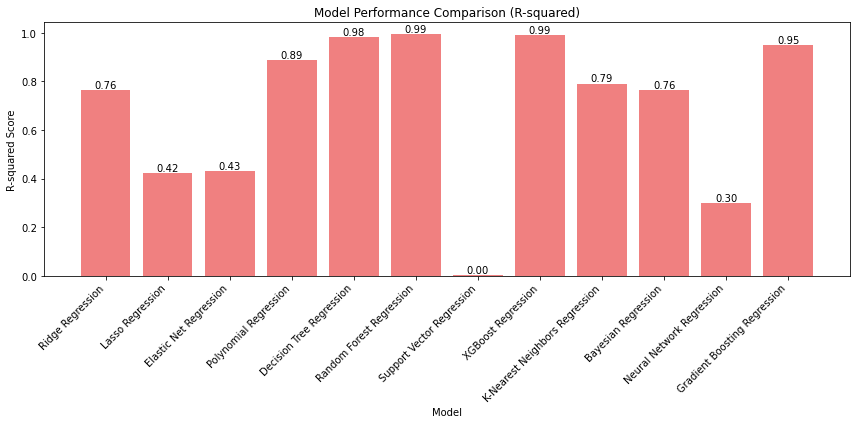

In [74]:
import matplotlib.pyplot as plt

# Extract MSE and R-squared scores from the model_performance dictionary
model_names = [model.split('. ')[1] for model in model_performance.keys()]
mse_scores = [performance['MSE'] for performance in model_performance.values()]
r2_scores = [performance['R-squared'] for performance in model_performance.values()]

# Create a bar plot for MSE scores
plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison (MSE)')
plt.xticks(rotation=45, ha='right')

# Display the values on top of each bar
for i, v in enumerate(mse_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()

# Create a bar plot for R-squared scores
plt.figure(figsize=(12, 6))
plt.bar(model_names, r2_scores, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Model Performance Comparison (R-squared)')
plt.xticks(rotation=45, ha='right')

# Display the values on top of each bar
for i, v in enumerate(r2_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()

plt.show()


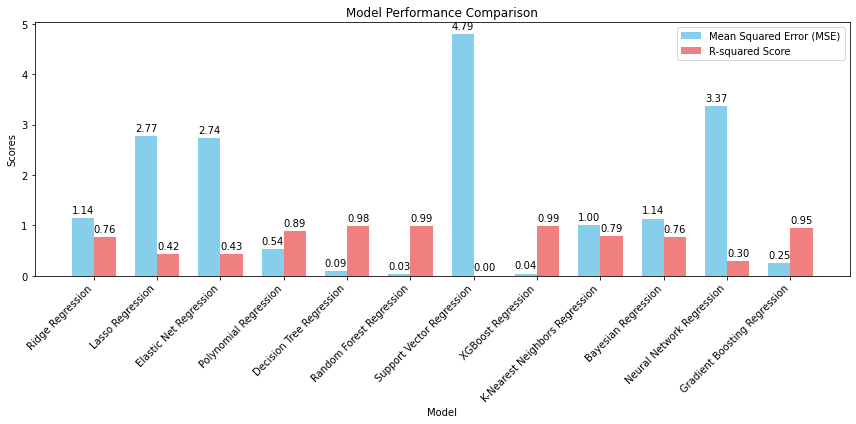

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Extract MSE and R-squared scores from the model_performance dictionary
model_names = [model.split('. ')[1] for model in model_performance.keys()]
mse_scores = [performance['MSE'] for performance in model_performance.values()]
r2_scores = [performance['R-squared'] for performance in model_performance.values()]

# Create positions for the bars in the plot
x = np.arange(len(model_names))
width = 0.35

# Create a single plot with both MSE and R-squared scores side by side
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, mse_scores, width, label='Mean Squared Error (MSE)', color='skyblue')
bar2 = ax.bar(x + width/2, r2_scores, width, label='R-squared Score', color='lightcoral')

# Set labels, title, and ticks
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Display the values on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)

ax.legend()

plt.tight_layout()
plt.show()

### STEP 9: Decide on a Optimum model for predicting results on user inputs.

* The Best Model is One with the Highest R2 Score and Lowest Mean Squared Error.

In [26]:
r2, mse = 0, 1000000 
best_model = None
for model, performance in model_performance.items():
    if performance['MSE'] < mse and performance['R-squared'] > r2:
        r2, mse = performance['R-squared'], performance['MSE']
        best_model = model
print("The Best Model is {} with MSE = {:.3f} and R2 Score = {:.3f}".format(best_model[3:],mse,r2))

The Best Model is Random Forest Regression with MSE = 0.030 and R2 Score = 0.994


-> Hence we will be using Random Forest Regressor as it best solves this regression problem.

### STEP 10: PROGRAM to PREDICT Disability-Adjusted Life Years (Loss in Life Expectancy).

In [28]:
print("Welcome to Mental Fitness Tracker!\n",
      "Fill the details (in %) to check your mental fitness! \n")

# Take user inputs
country = input("Enter the Country: ").lower().title()
Schizophrenia = float(input("Enter the Schizophrenia: "))
Bipolar_disorder = float(input("Enter the Bipolar_disorder: "))
Eating_disorder = float(input("Enter the Eating_disorder: "))
Anxiety = float(input("Enter the Anxiety: "))
Drug_usage = float(input("Enter the Drug_usage: "))
Depression = float(input("Enter the Depression: "))
Alcohol = float(input("Enter the Alcohol: "))

# Selection of relevant features for optimum results
select = ["Schizophrenia","Bipolar_disorder","Eating_disorder","Anxiety","Drug_usage","Depression","Alcohol"]
user_data = [Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol]
user_data = pd.DataFrame([user_data], columns=select)

#Selection of Data relevant to User's Country
xt = X[X["Country"]==country_dict[country]][select]
#xt = xt[select]
yt = y[X["Country"]==country_dict[country]]

# Predict the target(DALY) on user data using the best model
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(xt, yt)
forest_y_pred = forest_model.predict(user_data)
print("Your Mental Fitness Slack Score is {:.2f}".format(forest_y_pred[0]))
# Test Inputs
# India 0.283639	0.359677	0.087173	3.019089	0.439830	4.036884	1.618483
# Expected Mental Fitness Slack Score is 2.39

Welcome to Mental Fitness Tracker!
 Fill the details (in %) to check your mental fitness! 

Enter the Country: India
Enter the Schizophrenia: 0.283639
Enter the Bipolar_disorder: 0.359677
Enter the Eating_disorder: 0.087173
Enter the Anxiety: 3.019089
Enter the Drug_usage: 0.439830
Enter the Depression: 4.036884
Enter the Alcohol: 1.618483
Your Mental Fitness Slack Score is 2.42


### Result:
* The model predicts the Disability-Adjusted Life Years (Loss in Life Expectancy) based on the user inputs.